
# Fundamentals of Deep Learning 

*Notebook 1.10: SciPy*

In [ ]:
print("Ready?")

The best way to learn how to program is to learn is by doing. In this workshop you will be asked to write a lot of code. Click any block of code in this tutorial, such as the one above, and press ctrl+enter (shift+enter on a Mac) to run it. Let's begin right away and write our first little program!  

# SciPy

### Using SciPy
SciPy requires the **scipy** library. For the sake of brevity we will import this with a shorter name:

In [23]:
import scipy as sp
import numpy as np

#### Integration

Let us start with some integration $\int_{0}^{1} (ax^2 + b) \,dx $:

In [24]:
from scipy.integrate import quad
def integrand(x, a, b):
    return a*x**2 + b

Let us integrate between 0 and 1, setting a t0 2 and b to 1:

In [25]:
a = 2
b = 1
I = quad(integrand, 0, 1, args=(a,b))
I

(1.6666666666666667, 1.8503717077085944e-14)

#### Interpolation

Interpolation is a statistical method by which related known values are used to estimate an unknown quantity. Interpolation is achieved by using other established values that are located in sequence with the unknown value.

The **interp1d** class in **scipy.interpolate** is a convenient method to create a function based on fixed data points, which can be evaluated given data using linear interpolation. Let us take a look at a simple example:

In [26]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

Create some numbers on the x and y coordinates.  The **linspace** function generates $n$ evenly spaced numbers over a specified interval.

In [27]:
import numpy as np
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)
print(x)
print(y)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[ 1.          0.99383351  0.90284967  0.54030231 -0.20550672 -0.93454613
 -0.65364362  0.6683999   0.67640492 -0.91113026  0.11527995]


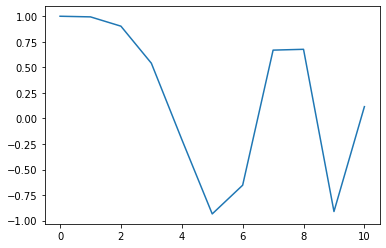

In [28]:
plt.plot(x, y)
plt.show()

In [29]:
f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')

In [31]:
xnew = np.linspace(0, 10, num=41, endpoint=True)
xnew

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,
        2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ,  4.25,
        4.5 ,  4.75,  5.  ,  5.25,  5.5 ,  5.75,  6.  ,  6.25,  6.5 ,
        6.75,  7.  ,  7.25,  7.5 ,  7.75,  8.  ,  8.25,  8.5 ,  8.75,
        9.  ,  9.25,  9.5 ,  9.75, 10.  ])

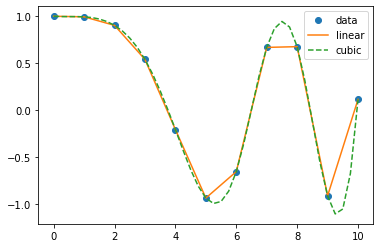

In [32]:
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.show()

You stil need to use the numpy arrays as scipy is built on top of numpy:


In [33]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

In [ ]:
#### Univariate interpolation

Assume that x and y represent known points. We will need to obtain the interpolated values yn for xn. As a representation, y0 will be the true values, generated from the original function to show the interpolator behavior.  If nothing about the plots is said, they will be generated as:

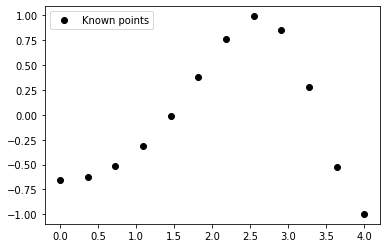

In [34]:
x = np.linspace(0, 4, 12)
y = np.cos(x**2/3+4)
plt.plot(x, y, 'ok', label='Known points')
plt.legend()
plt.show()

The linear interpolation is easy to compute but not precise, due to the discontinuites at the points.  We'll do some examples with this values using NumPy:

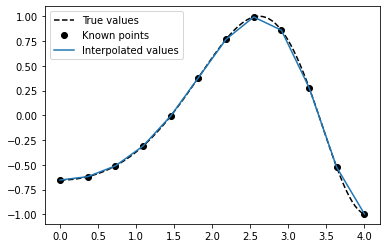

In [35]:
xn = np.linspace(0, 4, 100)
yn = np.interp(xn, x, y)
y0 = np.cos(xn**2/3+4)

plt.plot(xn, y0, '--k', label='True values')
plt.plot(x, y, 'ok', label='Known points')
plt.plot(xn, yn, label='Interpolated values')
plt.legend()
plt.show()

Let us do it using SciPy.  It's time to introduce the scipy's one-dimension interpolate class. The (interp1d) object will be created from the known points and we can obtain yn evaluating itself with the corresponding xn. interp1d offers different interpolation methods by the kind argument and the default is linear:

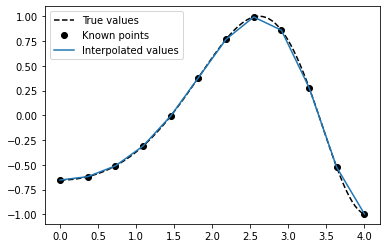

In [36]:
xn = np.linspace(0, 4, 100)
y0 = np.cos(xn**2/3+4)

f = interpolate.interp1d(x, y, kind='linear')
yn = f(xn)

plt.plot(xn, y0, '--k', label='True values')
plt.plot(x, y, 'ok', label='Known points')
plt.plot(xn, yn, label='Interpolated values')
plt.legend()
plt.show()



#### Nearest-neighbor interpolation

The univariate nearest-neighbor interpolation takes the same value of the closest known point:

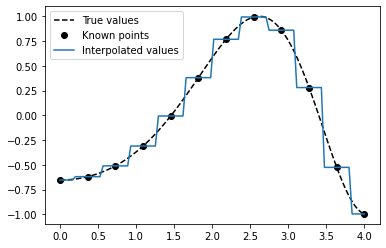

In [37]:
xn = np.linspace(0, 4, 100)
y0 = np.cos(xn**2/3+4)

f = interpolate.interp1d(x, y, kind='nearest')
yn = f(xn)

plt.plot(xn, y0, '--k', label='True values')
plt.plot(x, y, 'ok', label='Known points')
plt.plot(xn, yn, label='Interpolated values')
plt.legend()
plt.show()

#### Polynominal interpolation

Polynominal interpolation algorithms are computationally expensive and can present oscillator artifacts in the extremes due to the Runge's phenomenon. Due to this, it is much better idea the use of Chebyshev polynomials or interpolate using splines (more later).

Lagrange or Newton are examples of polynomial interpolation. Just to mention and to introduce different interpolation problems approaches in scipy, let's see the Lagrange interpolation:

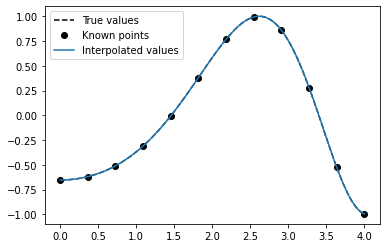

In [38]:
xn = np.linspace(0, 4, 100)
y0 = np.cos(xn**2/3+4)

f = interpolate.lagrange(x, y)
yn = f(xn)

plt.plot(xn, y0, '--k', label='True values')
plt.plot(x, y, 'ok', label='Known points')
plt.plot(xn, yn, label='Interpolated values')
plt.legend()
plt.show()


Alternativelly, we can use the class-based interpolators to generate a polynomial from the known points and then, call this polynomial with our xn data:

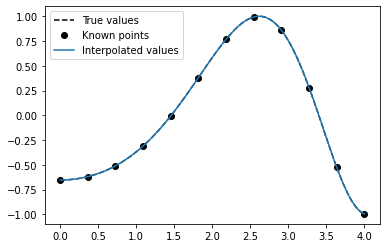

In [39]:
xn = np.linspace(0, 4, 100)
y0 = np.cos(xn**2/3+4)

f = interpolate.BarycentricInterpolator(x, y)
yn = f(xn)

plt.plot(xn, y0, '--k', label='True values')
plt.plot(x, y, 'ok', label='Known points')
plt.plot(xn, yn, label='Interpolated values')
plt.legend()
plt.show()



#### Splines

A spline is composed of polynomial functions connected by knots and, unlike the polynomial interpolation, does not present Runge's phenomenon, making the spline interpolation a stable and extended method of interpolation.

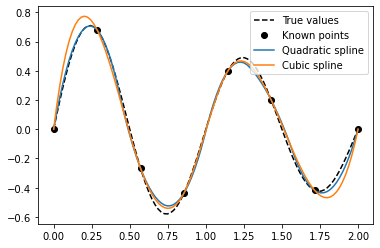

In [40]:
x = np.linspace(0, 2, 8)
y = 10*np.sinc(x*2+4)

xn = np.linspace(0, 2, 100)
y0 = 10*np.sinc(xn*2+4)

fq = interpolate.interp1d(x, y, kind='quadratic')
ynq = fq(xn)
fc = interpolate.interp1d(x, y, kind='cubic')
ync = fc(xn)

plt.plot(xn, y0, '--k', label='True values')
plt.plot(x, y, 'ok', label='Known points')
plt.plot(xn, ynq, label='Quadratic spline')
plt.plot(xn, ync, label='Cubic spline')
plt.legend()
plt.show()

Specifying an integer as a kind we'll set the order of the polynomials, taking into account that the order has to be lower than the number of known points:

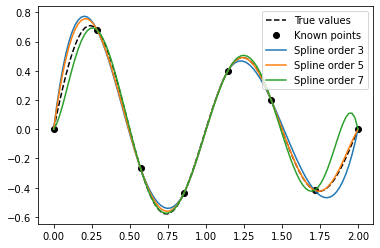

In [41]:
x = np.linspace(0, 2, 8)
y = 10*np.sinc(x*2+4)

xn = np.linspace(0, 2, 100)
y0 = 10*np.sinc(xn*2+4)

f3 = interpolate.interp1d(x, y, kind=3)
yn3 = f3(xn)
f5 = interpolate.interp1d(x, y, kind=5)
yn5 = f5(xn)
f7 = interpolate.interp1d(x, y, kind=7)
yn7 = f7(xn)


plt.plot(xn, y0, '--k', label='True values')
plt.plot(x, y, 'ok', label='Known points')
plt.plot(xn, yn3, label='Spline order 3')
plt.plot(xn, yn5, label='Spline order 5')
plt.plot(xn, yn7, label='Spline order 7')
plt.legend()
plt.show()

#### Statistics

The statistics functions are located in the sub-package scipy.stats and a fairly complete listing of these functions can be obtained using info(stats)

In [42]:
import scipy.stats as st

In [43]:
st.norm.mean(), st.norm.std(), st.norm.var()


(0.0, 1.0, 1.0)

Imagine we computed the probability of a fair coin producing at-least sixteen heads after twenty flips. Our calculations required us to examine all possible combinations of twenty flipped coins. Afterwards, we computed the probability of observing sixteen or more heads or sixteen or more tails, in order to measure the randomness of our observations. SciPy allows us to measure this probability directly using the stats.binomial_test method.

The method is named after the Binomial distribution, which governs how a flipped coin might fall. The method requires three parameters: the number of heads, the total number of coin flips, and the probability of a coin landing on heads. Let’s apply the Binomial test to sixteen heads observed from twenty coin-flips. Our output should equal the previously computed value of approximately 0.011.

#### The following analyzes extreme head-counts using SciPy

num_heads = 16
num_flips = 20
prob_head = 0.5
prob = binom_test(num_heads, num_flips, prob_head)
print(f"Probability of observing more than 15 heads or 15 tails is {prob:.17f}")

Let us generate 10 random floating point values between 0 and 100:

In [ ]:
st.uniform.rvs( 0, 100, size=10 )

#### Normal Continuous Random Distribution

In this type of probability distribution, the variable can take any value. Hence, it is known as a continuous random variable.  Here we import the norm function which inherits from the rv_continuous class. The functions include methods and details to work on the specific continuous distribution.  We use the norm function to calculate the cdf on an array.

In [44]:
from scipy.stats import norm
import numpy as np
a=np.array([2,-1,4,1,3,0])
print(norm.cdf(a))

[0.97724987 0.15865525 0.99996833 0.84134475 0.9986501  0.5       ]


#### Uniform Distribution in SciPy
Similarly, we can generate a uniform distribution. We need to import the uniform function and then generate the CDF of the array.  We can increase the functionality with the use of scale and loc keyword. The scale keyword defines the standard deviation and the loc defines the mean value.

In [45]:
from scipy.stats import uniform
a=np.array([9,8,7,3,2])
print (uniform.cdf(a, loc =5 , scale = 3))

[1.         1.         0.66666667 0.         0.        ]


#### Binomial Distribution in SciPy
We can generate a binomial distribution by importing binom the instance of rv_discrete class. It consists of methods and details from class.

In [46]:
from scipy.stats import binom
a=np.array([9,8,7,3,2])
print (binom.cdf(a,n=2,p=5))

[1. 1. 1. 1. 1.]


#### SciPy Descriptive Statistics

We use descriptive statistical functions to decode certain values from the output. These functions evaluate min, max, mean values from the input NumPy arrays. Some of the functions in stats are:

- describe()- it returns descriptive stats of the arrays
- gmean()- it returns the geometric mean along a specific axis of an array
- hmean()- it returns the harmonic mean along a specific axis of an array
- sem()- it returns the standard error mean of the mean
- kurtosis()- it returns the kurtosis value of an array
- mode()- it returns the mode of an array
- skew()- it is to perform the skew test on an array
- zscore()- it returns the z-score relative to the mean and standard deviation values.

#### gmean() 

The geometric mean is a mean or average, which indicates the central tendency or typical value of a set of numbers by using the product of their values (as opposed to the arithmetic mean which uses their sum). The geometric mean is defined as the $n^{th}$ root of the product of n numbers, i.e., for a set of numbers $x_{1}$, $x_{2}$, ..., $x_{n}$, the geometric mean is defined as: $(\prod_{i=1}^n x_i)^\frac{1}{n}$

In [47]:
from scipy.stats.mstats import gmean
arr1 = [[1, 3, 27],
        [3, 4, 6],
        [7, 6, 3],
        [3, 6, 8]]
  
# using axis = 0
print("\nGeometric Mean is with default axis = 0 : \n", gmean(arr1, axis = 0))
 
# using axis = 1
print("\nGeometric Mean is with default axis = 1 : \n", gmean(arr1, axis = 1))


Geometric Mean is with default axis = 0 : 
 [2.81731325 4.55901411 7.89644408]

Geometric Mean is with default axis = 1 : 
 [4.32674871 4.16016765 5.01329793 5.24148279]


#### describe()

The describe functon computes the descriptive statistics of the passed array elements along the specified axis of the array.

In [48]:
from scipy.stats import binom
a=np.array([9,8,7,3,2])
st.describe(a)

DescribeResult(nobs=5, minmax=(2, 9), mean=5.8, variance=9.700000000000001, skewness=-0.29310456784806604, kurtosis=-1.6703687958337765)

#### Z-Score

The Z-Score function computes the relative Z-score of the input data, relative to the sample mean and standard deviation.  It tells us how many standard deviations away a value is from the mean. The z-score is calculated as follows:

$z = (X – \mu)\sigma$

where:

- $X$ is a single raw data value
- $\mu$ is the population mean
- $\sigma$ is the population standard deviation


#### Import Modules

In [49]:
import pandas as pd
import numpy as np
import scipy.stats as stats

Create an array of values

In [50]:
data = np.array([6, 7, 7, 12, 13, 13, 15, 16, 19, 22])

Calculate the z-scores for each value in the array

In [51]:
stats.zscore(data)

array([-1.39443338, -1.19522861, -1.19522861, -0.19920477,  0.        ,
        0.        ,  0.39840954,  0.5976143 ,  1.19522861,  1.79284291])

#### T-Test in SciPy
We perform the T-test to evaluate the difference between the mean (average) values of two arrays. We consider the value of T-Test as a significant difference in the two data sets.

#### T-score
T-score is the concept of relativity. We compute the ratio between the two sets of data. The T-score value describes the difference in arrays. The smaller the value, the more similar are the arrays and vice versa.  The two data sets for comparison can be of any type. The two arrays can even follow dissimilar distribution patterns.

In [52]:
from scipy import stats  
a = stats.norm.rvs(loc = 2, scale = 1, size = (10,5))  
print(stats.ttest_1samp(a,2.0))

Ttest_1sampResult(statistic=array([ 0.35330914, -1.11207024, -1.25914321, -0.32260794,  1.10872374]), pvalue=array([0.73199106, 0.29492972, 0.23965451, 0.75436056, 0.29629648]))


The stats module is a very important feature of SciPy. It is useful for obtaining probabilistic distributions. SciPy Stats can generate discrete or continuous random numbers. It also consists of many other functions to generate descriptive statistical values.  We can deal with random, continuos, and random variables. We have functions for working with various types of distributions. Also, we can perform the T-test on the data to evaluate the mean value. We have descriptive statistics for in-depth operations.

-------------

Congratulations!  You have completed the hands-on lab!

-------------